# 4. Other diabetes metrics
Calculating the other metrics of diabetes control and comparing them.

## 4.1. Import packages and upload data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import sys
import pyCompare
sys.path.append("/Users/cr591/OneDrive - University of Exeter/Desktop/diametrics/diametrics")
import metrics as cgm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [26]:
df = pd.read_csv('~/OneDrive - University of Exeter/Desktop/PhD/Projects/interpolation-for-hypo-detection/dexcom-maths-exploration/data/tidy_data/interp_dataset.csv')
df.dropna(subset=['glc'], inplace=True)

In [27]:
# Combine baseline and 6-month periods for those who have both by selecting only the ID
df_2weeks = copy.copy(df)
#df_2weeks['ID'] = df['ID'].apply(lambda x: x[:4])

In [18]:
r_results = pd.read_csv('r_metrics.csv')

## 4.2. Diabetes metrics for each person for each interpolation method

In [28]:
# Interpolation methods
methods = ['glc', 'cut_glc', 'pchip', 'linear', 'cubicspline', 'akima', 
        'polynomial_3', 'polynomial_5', 'polynomial_7', 'matern', 'rq', 'rbf']
# Dictionary for results
results_dict = {}
# Loop through all of the columns and calculate all diabetes metrics
for method in methods:
    sub_df = df_2weeks[['time', 'ID', method]]
    sub_df.columns = ['time', 'ID', 'glc']
    # cut_glc is 15 min intervals, the rest are 5
    if method == 'cut_glc':
        interval_size = 15
    else:
        interval_size = 5
    # Add the results to the dictionary with method name as key
    results_dict[method] = cgm.all_metrics(sub_df, 'time', 'glc', 'ID',
                                           interval_size=interval_size)

In [29]:
# Diabetes metrics for 5-minute data for each person
results_dict['glc'].round(2).sort_values('ID')

,ID,TIR_lv2_hypo,TIR_lv1_hypo,TIR_hypo,TIR_norm,TIR_hyper,TIR_lv1_hyper,TIR_lv2_hyper,number_hypos,avg_length_of_hypo,total_time_in_hypos,number_lv1_hypos,number_lv2_hypos,sd,cv,minimum_glucose,maximum_glucose,average_glucose,mage+,mage-,mage_mean,percent_missing,ea1c
86,1001_baseline,1.24,2.48,3.71,65.99,30.30,19.01,11.29,7,0 days 00:27:51.428571428,0 days 03:15:00,4,3,3.47,39.30,2.22,19.37,8.83,8.31,-8.20,8.25,2.76,7.18
36,1003_6months,2.32,6.05,8.37,51.69,39.94,23.85,16.09,9,0 days 01:28:20,0 days 13:15:00,6,3,4.57,47.72,2.22,22.20,9.57,9.42,-9.37,9.40,0.35,7.65
47,1003_baseline,2.44,9.76,12.20,57.06,30.74,22.51,8.23,10,0 days 01:52:30,0 days 18:45:00,5,5,3.95,46.87,2.22,20.09,8.43,8.18,-8.53,8.35,1.01,6.93
68,1004_6months,1.13,0.59,1.72,48.76,49.52,38.09,11.42,3,0 days 00:48:20,0 days 02:25:00,0,3,3.03,29.93,2.22,20.14,10.13,7.77,-7.10,7.44,3.28,8.00
58,1004_baseline,1.42,2.84,4.26,33.26,62.48,16.82,45.66,6,0 days 00:55:00,0 days 05:30:00,4,2,5.66,43.72,2.22,22.20,12.95,13.43,-13.29,13.36,4.18,9.78
62,1005_6months,0.00,0.70,0.70,34.49,64.80,24.62,40.18,2,0 days 00:27:30,0 days 00:55:00,2,0,4.91,39.09,3.50,22.20,12.57,12.94,-13.21,13.08,0.05,9.53
42,1006_baseline,2.63,8.78,11.41,53.39,35.20,14.60,20.59,5,0 days 02:20:00,0 days 11:40:00,2,3,4.78,51.90,2.22,20.37,9.21,10.44,-10.25,10.34,36.10,7.42
16,1007_baseline,0.00,1.02,1.02,45.98,53.00,25.41,27.60,2,0 days 00:27:30,0 days 00:55:00,2,0,4.52,41.85,3.33,22.20,10.80,10.15,-10.40,10.28,0.45,8.42
25,1008_6months,7.67,5.39,13.06,51.64,35.30,22.66,12.64,5,0 days 02:25:00,0 days 12:05:00,2,3,4.60,51.80,2.22,22.20,8.87,10.49,-10.67,10.58,0.17,7.21
38,1008_baseline,7.04,8.53,15.56,58.35,26.09,19.47,6.63,17,0 days 01:24:42.352941176,1 days 00:00:00,11,6,4.09,52.55,2.22,22.20,7.79,9.09,-8.87,8.98,2.05,6.53


In [30]:
# Statistical overview of diabetes metrics for 5-minute data
results_dict['glc'].describe().round(2)

,TIR_lv2_hypo,TIR_lv1_hypo,TIR_hypo,TIR_norm,TIR_hyper,TIR_lv1_hyper,TIR_lv2_hyper,number_hypos,avg_length_of_hypo,number_lv1_hypos,number_lv2_hypos,sd,cv,minimum_glucose,maximum_glucose,average_glucose,mage+,mage-,mage_mean,percent_missing,ea1c
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,85,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,1.38,2.59,3.97,50.81,45.22,25.15,20.07,4.32,0 days 01:07:03.230390716,2.67,1.66,3.84,37.66,2.84,20.59,10.26,9.17,-9.18,9.18,5.61,8.08
std,2.35,2.71,4.56,18.10,19.26,9.00,16.41,4.12,0 days 00:44:05.411034983,2.59,2.08,0.95,7.58,0.95,2.45,2.08,2.37,2.32,2.32,8.94,1.31
min,0.00,0.00,0.00,10.43,3.70,3.70,0.00,0.00,0 days 00:20:00,0.00,0.00,1.73,19.24,2.22,12.21,6.44,4.23,-15.07,4.31,-0.01,5.68
25%,0.00,0.58,0.69,38.31,30.27,18.99,8.32,1.00,0 days 00:30:00,1.00,0.00,3.17,31.94,2.22,19.42,8.80,7.78,-10.68,7.92,0.49,7.17
50%,0.45,1.41,2.10,48.84,45.61,24.59,16.58,3.00,0 days 00:57:00,2.00,1.00,3.84,36.40,2.39,22.17,10.15,9.00,-9.05,9.09,2.21,8.01
75%,1.98,3.69,4.94,63.66,58.58,32.38,28.06,6.00,0 days 01:28:20,4.00,3.00,4.55,42.03,3.24,22.20,11.56,10.56,-7.80,10.56,6.27,8.90
max,16.02,10.60,24.06,92.60,88.95,45.98,78.74,20.00,0 days 03:45:00,15.00,9.00,6.32,59.94,7.27,22.22,17.38,17.38,-4.38,16.23,49.12,12.56


## 4.3. Mean difference for all of the metrics

Here I calculate the mean difference between the interpolation methods with the original 5-minute data for all of the metrics of diabetes control.

In [5]:
# List of the metrics of diabetes control
metrics = ['TIR lv2 hypo (<3)', 'TIR lv1 hypo (3-3.9)', 'TIR hypo (<3.9)',
       'TIR norm (3.9-10)', 'TIR hyper (>10)', 'TIR lv1 hyper (10-13.9)',
       'TIR_lv2_hyper (>13.9)', 'number hypos', 'number lv1 hypos', 
           'number lv2 hypos', 'sd', 'cv', 'ea1c', 'avg glucose']
# Get the interpolation methods from the keys of the dictionary
methods = results_dict.keys()

In [15]:
# Declare list for results
perc_diff_list = []
# For each metric in each method, calculate the mean difference compared to 5-minute data
for method in methods:
    for metric in metrics:
        diff =  results_dict['glc'][metric] - results_dict[method][metric]
        mean_diff = diff.mean()
        perc_diff_list.append([method, metric, mean_diff])
# Convert to dataframe       
perc_diff_df = pd.DataFrame(perc_diff_list, columns = ['method', 'metric', 'mean_diff'])

In [16]:
# Mean difference table
pd.pivot_table(perc_diff_df, index=['method'], columns=['metric'])

mean_diff                                          \
metric       TIR hyper (>10) TIR hypo (<3.9) TIR lv1 hyper (10-13.9)   
method                                                                 
akima              -0.050600        0.069080               -0.062727   
cubicspline        -0.093789        0.052396               -0.086864   
cut_glc            -0.047382       -0.007073               -0.043557   
glc                 0.000000        0.000000                0.000000   
linear             -0.075937        0.145556               -0.117012   
matern              0.018719        0.039921               -0.048542   
pchip              -0.055651        0.080269               -0.068634   
polynomial_3       -0.093789        0.052396               -0.086864   
polynomial_5       -0.099743        0.049694               -0.088449   
polynomial_7       -0.075764        0.047169               -0.063036   
rbf                -0.093604        0.050561               -0.084135   
rq                 -0.052387        0.123835               -0.107089   

                                                                       \
metric       TIR lv1 hypo (3-3.9) TIR lv2 hypo (<3) TIR norm (3.9-10)   
method                                                                  
akima                    0.081357         -0.012277         -0.018480   
cubicspline              0.076834         -0.024438          0.041393   
cut_glc                 -0.017480          0.010407          0.054455   
glc                      0.000000          0.000000          0.000000   
linear                   0.090633          0.054923         -0.069619   
matern                   0.076173         -0.036252         -0.058640   
pchip                    0.077228          0.003041         -0.024618   
polynomial_3             0.076834         -0.024438          0.041393   
polynomial_5             0.081813         -0.032119          0.050049   
polynomial_7             0.080142         -0.032973          0.028595   
rbf                      0.082537         -0.031976          0.043043   
rq                       0.094599          0.029236         -0.071448   

                                                                    \
metric       TIR_lv2_hyper (>13.9) avg glucose        cv      ea1c   
method                                                               
akima                     0.012127   -0.001733  0.068540 -0.001090   
cubicspline              -0.006925   -0.001777  0.026784 -0.001118   
cut_glc                  -0.003825   -0.003779 -0.003188 -0.002377   
glc                       0.000000    0.000000  0.000000  0.000000   
linear                    0.041075   -0.001722  0.212674 -0.001083   
matern                    0.067261    0.010586  0.010196  0.006658   
pchip                     0.012983   -0.001774  0.085663 -0.001116   
polynomial_3             -0.006925   -0.001777  0.026784 -0.001118   
polynomial_5             -0.011295   -0.001659  0.010926 -0.001044   
polynomial_7             -0.012728   -0.000949 -0.008539 -0.000597   
rbf                      -0.009469   -0.001049  0.000397 -0.000660   
rq                        0.054702   -0.000262  0.196005 -0.000165   

                                                                       
metric       number hypos number lv1 hypos number lv2 hypos        sd  
method                                                                 
akima            0.015385         0.015385         0.000000  0.006153  
cubicspline     -0.061538         0.015385        -0.076923  0.002145  
cut_glc          0.461538         0.123077         0.338462 -0.002631  
glc              0.000000         0.000000         0.000000  0.000000  
linear           0.200000         0.030769         0.169231  0.020634  
matern          -0.076923        -0.015385        -0.061538  0.005265  
pchip            0.046154         0.030769         0.015385  0.007840  
polynomial_3    -0.061538         0.015385        -0.076923  0.002145  

## 4.4. Bland-Altman plots

Blant-Altman plots show us a more detailed spread than the mean difference alone.

In [33]:
r_results.columns = ['h', 'id', 'glc_auc', 'cut_glc_auc', 'glc_lbgi', 'cut_glc_lbgi',
                     'glc_hbgi', 'cut_glc_hbgi']

In [34]:
auc = r_results[['id', 'glc_auc', 'cut_glc_auc']].dropna()

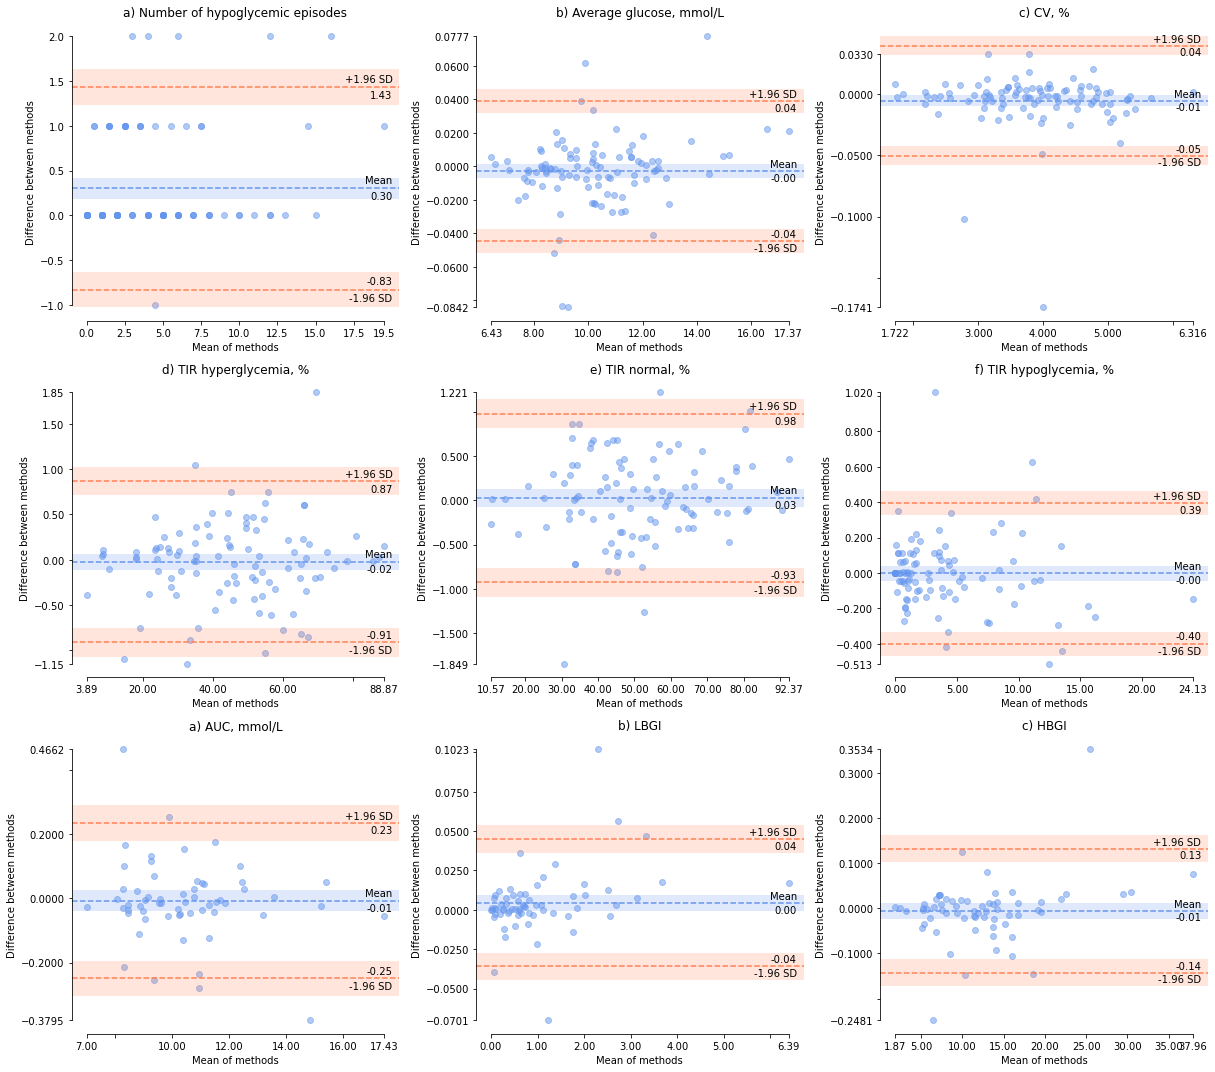

In [49]:
# Create matplotlib figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(17,15))
# Number of hypoglycaemic episodes
pyCompare.blandAltman(results_dict['glc']['number_hypos'], 
                      results_dict['cut_glc']['number_hypos'], ax=ax1)
ax1.set_title('a) Number of hypoglycemic episodes')
# Average glucose
pyCompare.blandAltman(results_dict['glc']['average_glucose'], 
                      results_dict['cut_glc']['average_glucose'], ax=ax2)
ax2.set_title('b) Average glucose, mmol/L')
# Standard deviation/glycaemic variability
pyCompare.blandAltman(results_dict['glc']['sd'], 
                      results_dict['cut_glc']['sd'], ax=ax3)
ax3.set_title('c) CV, %')
# Time in range (TIR) hyperglycaemia 
pyCompare.blandAltman(results_dict['glc']['TIR_hyper'], 
                      results_dict['cut_glc']['TIR_hyper'], ax=ax4)
ax4.set_title('d) TIR hyperglycemia, %')
# TIR normal
pyCompare.blandAltman(results_dict['glc']['TIR_norm'], 
                      results_dict['cut_glc']['TIR_norm'], ax=ax5)
ax5.set_title('e) TIR normal, %')
# TIR hyperglycaemia
pyCompare.blandAltman(results_dict['glc']['TIR_hypo'], 
                      results_dict['cut_glc']['TIR_hypo'], ax=ax6)
# Set title and save
ax6.set_title('f) TIR hypoglycemia, %')
# Number of hypoglycaemic episodes
pyCompare.blandAltman(auc['glc_auc'], 
                      auc['cut_glc_auc'], ax=ax7)
ax7.set_title('a) AUC, mmol/L')
# Average glucose
pyCompare.blandAltman(r_results['glc_lbgi'], 
                      r_results['cut_glc_lbgi'], ax=ax8)
ax8.set_title('b) LBGI')
# Standard deviation/glycaemic variability
pyCompare.blandAltman(r_results['glc_hbgi'], 
                      r_results['cut_glc_hbgi'], ax=ax9)
ax9.set_title('c) HBGI')
fig.tight_layout()
fig.savefig('bland_altmans.png')